In [1]:
from pycap import PropertyTree
from pycap import CyclicVoltammetry
import sys
sys.path.append('/notebooks')
from battery import *
from energy_storage_device import Dualfoil
from matplotlib import pyplot

In [2]:
file_path = '/notebooks/docker/dualfoil5-1/'
df1 = Dualfoil(path=file_path)
init_v1 = df1.get_voltage()
df2 = Dualfoil(path=file_path)
init_v2 = df2.get_voltage()
print(init_v1, init_v2)

4.51601 4.51601


In [ ]:
#-------------------------------------------------------------------------------------------

In [73]:
# larger voltage interval with larger step
# BIG currents
v1 = 2.5
v2 = 4.5
step_size = .10
ptree1 = PropertyTree()
ptree1.put_double('cycles', 6)
ptree1.put_double('scan_limit_1', v1)
ptree1.put_double('scan_limit_2', v2)
ptree1.put_double('initial_voltage', 4.50)
ptree1.put_double('final_voltage', 4.50)
ptree1.put_double('scan_rate', 25e-3)
ptree1.put_double('step_size', step_size)

In [74]:
%matplotlib inline
from pycap import initialize_data, plot_data
data1 = initialize_data()

df1.reset()
exp = CyclicVoltammetry(ptree1)
%time exp.run(df1, data1)


.................................................................................................................................................................................................................................................CPU times: user 2.14 s, sys: 11.7 s, total: 13.8 s
Wall time: 13min 30s


240

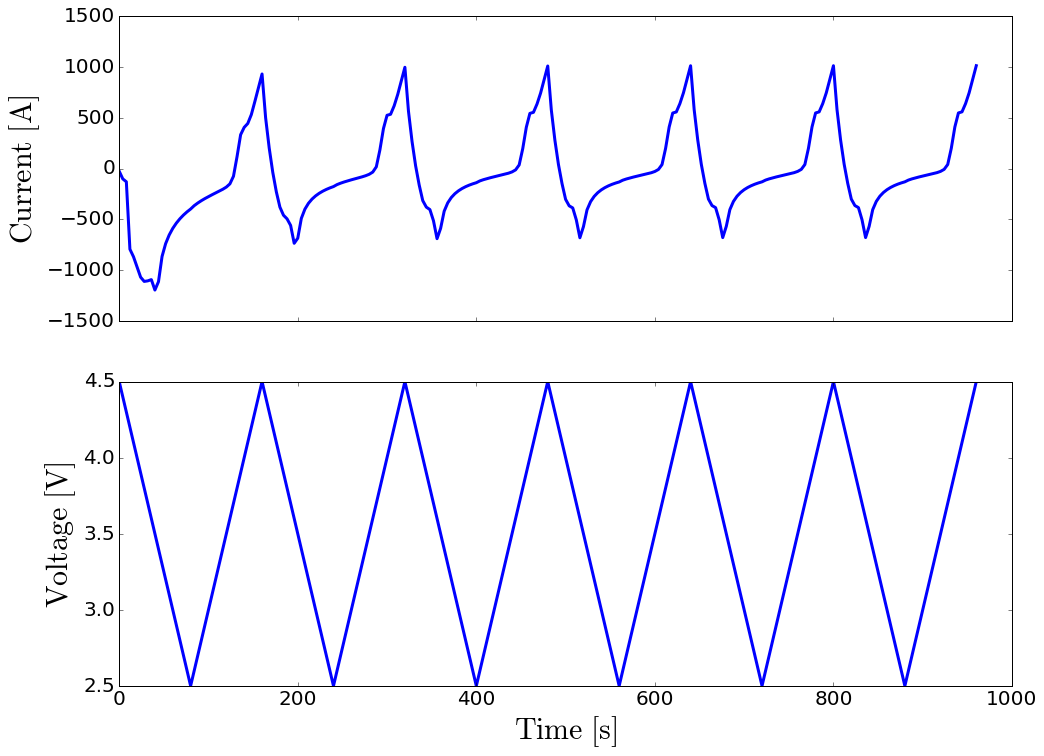

In [78]:
plot_data(data1)

42


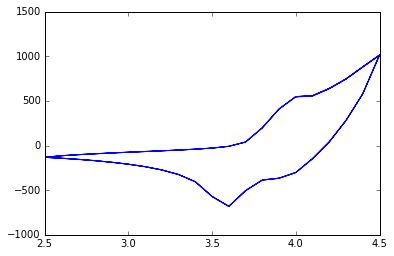

In [81]:
# variable to count the number of steps per cycle
# used to print only one cycle
cycle = int(2*((v2-(v1-step_size)) / step_size))
print(cycle)
# plot last 3 cycles 
y = data1['current'][-3*cycle:]
x = data1['voltage'][-3*cycle:]
pyplot.plot(x, y)
#pyplot.xlim(-1e-5, 1e-5)

In [ ]:
#-------------------------------------------------------------------------------------------

In [101]:
# shorter voltage interval with smaller step
# slightly more reasonable current range
v1 = 4.0
v2 = 3.6
step_size = .015
ptree2 = PropertyTree()
ptree2.put_double('cycles', 4)
ptree2.put_double('scan_limit_1', v1)
ptree2.put_double('scan_limit_2', v2)
ptree2.put_double('initial_voltage', v1)
ptree2.put_double('final_voltage', v1)
ptree2.put_double('scan_rate', 1e-3)
ptree2.put_double('step_size', step_size)

In [102]:
%matplotlib inline
from pycap import initialize_data, plot_data
data2 = initialize_data()

df2.reset()
exp = CyclicVoltammetry(ptree2)
%time exp.run(df2, data2)


.........................................................................................................................................................................................................................CPU times: user 2.14 s, sys: 11.2 s, total: 13.4 s
Wall time: 12min 14s


216

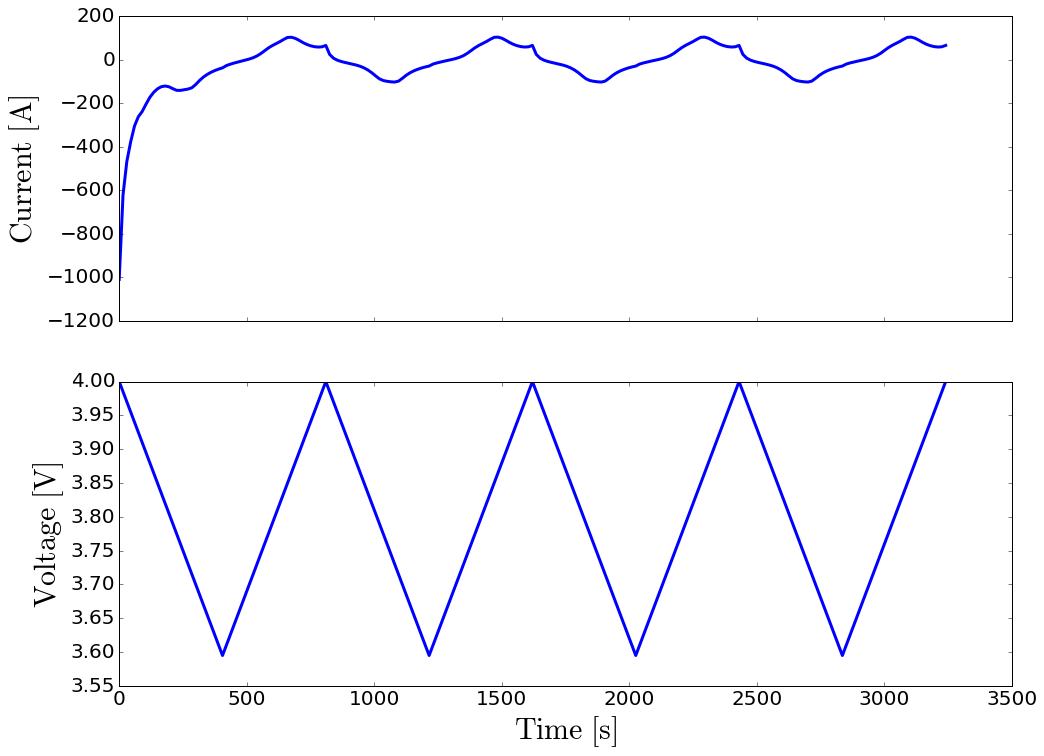

In [103]:
plot_data(data2)

55


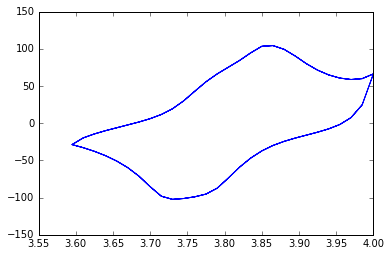

In [113]:
# variable to count the number of steps per cycle
# used to print only one cycle
cycle = int(2*((v1-(v2-step_size)) / step_size))
print(cycle)
# don't print the first cycle
y = data2['current'][cycle:]
x = data2['voltage'][cycle:]
pyplot.plot(x, y)
#pyplot.xlim(-1e-5, 1e-5)

In [114]:
pyplot.subplot